In [1]:
include("../continuous_hopfield.jl")
using Plots
using LaTeXStrings
using Random, Distributions

Take three patterns $\vec{\xi}_{1}$, $\vec{\xi}_{2}$ and $\vec{\xi}_{3}$. Those three patterns are points in the d-dimensional space and thus they define a plane. The goal is to obtain other points on the same plane and compute the energy for each of them. A new pattern can be found as: $$ \vec{\xi}_{new} = \vec{\xi}_{1} + \alpha_1 (\vec{\xi}_{2} - \vec{\xi}_{1}) + \alpha_2 (\vec{\xi}_{3} - \vec{\xi}_{1}),$$
where $$ 0 \leq \alpha_i \leq 1 $$

In [2]:
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ1, σ2, σ3 = ξ[:, 1], ξ[:, 2], ξ[:, 3]

([-0.38967372365728165, 1.191490201819901, -0.5650173925237065, -0.401184470263561, -0.05980370247951702, -3.398850770094523, 0.4972816851763767, 1.921203128228177, -0.11150617276601917, 1.1030321978945175, 0.11822966111679331, 0.3716541389217044, 0.7693480009973422, 1.3219319142337056, -0.43373530229919494, -0.8545278520069284, -0.1494809679234737, -0.9615457166605613, -0.28445580187344727, 0.11215367788751437], [-0.05361057433943668, 0.04407439959454778, -0.43329459242368884, 1.6677032308997894, -0.3951754230235257, -0.17578027739462812, -1.4323989388600504, -0.3088462176967335, 0.2214064922651747, 1.7961539766325727, -0.06929319952763102, -0.6836035625616546, -0.47762643472438276, -0.06865325572549398, -0.5146415924158373, -1.8213823177109463, 0.18980303873227045, -0.08119157127548414, 1.0860127484013076, -0.7956869765397276], [-0.43095851295562576, -1.634708013759599, 0.010096572666747714, -1.099976801258935, -0.16796066837283097, 1.8518388798120224, 1.5447310045526312, -0.15831287

In [3]:
α1 = range(-1, 2, length = 150)
α2 = range(-1, 2, length = 150)

Z = zeros(length(α1), length(α2))

for i in 1:length(α1)
    a = α1[i]
    for j in 1:length(α2)
        σ_new = σ1 + a*(σ2 - σ1) + α2[j]*(σ3 -σ1)
        Z[i, j] = CH.energy(σ_new, ξ, 1, 1)
    end
end

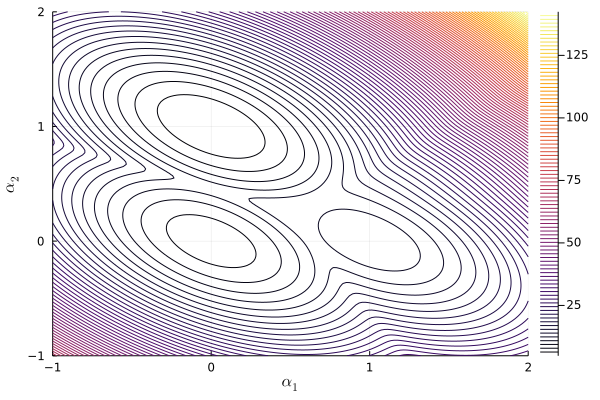

In [4]:
Plots.contour(α1, α2, Z', levels = 90, xlabel = L"α_1", ylabel = L"α_2")


In [17]:
CH.energy(σ1, ξ, 1, 1)

7.721783364663898

In [18]:
CH.energy(σ2, ξ, 1, 1)

4.966823403951556

In [19]:
CH.energy(σ3, ξ, 1, 1)

9.426359527149293

In [6]:
M = 30
N = 20
ξ = CH.generate_patterns(M, N)
σ = ξ[:, 1]
σ_new = CH.perturb(σ, 2.0)
CH.energy(σ_new, ξ)

32.777743105798805

In [10]:
σ_rec = CH.update(σ_new, ξ; β = 20, nsweeps = 1)
CH.energy(σ_rec, ξ)

3.0899910666333845

In [ ]:
overlap